In [1]:
from models.vit_lit import VitModel
from models.modeling import CONFIGS
from utils.data_utils import get_loader_test
import torch
import pytorch_lightning as pl
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import softmax
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(font_scale=1.5)
import os
import glob
plt.rcParams['figure.dpi'] = 300

In [18]:
import argparse
import shlex
def main(cmd=''):
    parser = argparse.ArgumentParser()
    # Required parameters
    parser.add_argument("--name", required=True,
                        help="Name of this run. Used for monitoring.")
    parser.add_argument("--dataset", choices=["cifar10", "cifar100"], default="cifar10",
                        help="Which downstream task.")
    parser.add_argument("--model_type", choices=["ViT-B_16", "ViT-B_32", "ViT-L_16",
                                                 "ViT-L_32", "ViT-H_14", "R50-ViT-B_16"],
                        default="ViT-B_16",
                        help="Which variant to use.")
    parser.add_argument("--pretrained_dir", type=str, default="checkpoint/ViT-B_16.npz",
                        help="Where to search for pretrained ViT models.")
    parser.add_argument("--output_dir", default="output", type=str,
                        help="The output directory where checkpoints will be written.")

    parser.add_argument("--img_size", default=224, type=int,
                        help="Resolution size")
    parser.add_argument("--train_batch_size", default=512, type=int,
                        help="Total batch size for training.")
    parser.add_argument("--eval_batch_size", default=64, type=int,
                        help="Total batch size for eval.")
    parser.add_argument("--eval_every", default=100, type=int,
                        help="Run prediction on validation set every so many steps."
                             "Will always run one evaluation at the end of training.")

    parser.add_argument("--learning_rate", default=3e-2, type=float,
                        help="The initial learning rate for SGD.")
    parser.add_argument("--weight_decay", default=0, type=float,
                        help="Weight deay if we apply some.")
    parser.add_argument("--num_steps", default=10000, type=int,
                        help="Total number of training epochs to perform.")
    parser.add_argument("--decay_type", choices=["cosine", "linear"], default="cosine",
                        help="How to decay the learning rate.")
    parser.add_argument("--warmup_epochs", default=2, type=int,
                        help="Epochs of training to perform learning rate warmup for.")
    parser.add_argument("--max_grad_norm", default=1.0, type=float,
                        help="Max gradient norm.")

    parser.add_argument("--local_rank", type=int, default=-1,
                        help="local_rank for distributed training on gpus")
    parser.add_argument('--seed', type=int, default=42,
                        help="random seed for initialization")
    parser.add_argument('--gradient_accumulation_steps', type=int, default=1,
                        help="Number of updates steps to accumulate before performing a backward/update pass.")
    parser.add_argument('--fp16', action='store_true',
                        help="Whether to use 16-bit float precision instead of 32-bit")
    parser.add_argument('--fp16_opt_level', type=str, default='O2',
                        help="For fp16: Apex AMP optimization level selected in ['O0', 'O1', 'O2', and 'O3']."
                             "See details at https://nvidia.github.io/apex/amp.html")
    parser.add_argument('--loss_scale', type=float, default=0,
                        help="Loss scaling to improve fp16 numeric stability. Only used when fp16 set to True.\n"
                             "0 (default value): dynamic loss scaling.\n"
                             "Positive power of 2: static loss scaling value.\n")
    if cmd != '':
        args = parser.parse_args(cmd)
    else:
        args = parser.parse_args()

    return args 

args = main(shlex.split('--name cifar10-100_500_rank64  --dataset cifar10 --model_type ViT-B_16 --pretrained_dir checkpoint/ViT-B_16.npz --fp16 --fp16_opt_level O2 --gradient_accumulation_steps 15 --train_batch_size 64  --num_steps 2000'))

In [19]:
from utils.data_utils import get_loader
dataset = get_loader(args)
dataset = next(iter(next(iter(dataset))))

Files already downloaded and verified
Files already downloaded and verified


Exception ignored in: <function _releaseLock at 0x7fb73c652290>
Traceback (most recent call last):
  File "/usr/lib/python3.10/logging/__init__.py", line 228, in _releaseLock
    def _releaseLock():
  File "_pydevd_bundle/pydevd_cython.pyx", line 1366, in _pydevd_bundle.pydevd_cython.SafeCallWrapper.__call__
  File "_pydevd_bundle/pydevd_cython.pyx", line 1667, in _pydevd_bundle.pydevd_cython.ThreadTracer.__call__
  File "/home/haotian/Enviroments/env1/lib/python3.10/site-packages/debugpy/_vendored/pydevd/_pydev_bundle/pydev_is_thread_alive.py", line 9, in is_thread_alive
    def is_thread_alive(t):
KeyboardInterrupt: 


: 

In [2]:
av_list = []
path = f'runs/cifar10-100_500_{64}/version_0/checkpoints'
path = glob.glob(f'{path}/*') # * means all if need specific format then *.csv
file = max(path, key=os.path.getctime)
model = VitModel.load_from_checkpoint(file, strict=False)
_, A = model.model.transformer(dataset[0])
res = {}



# for l in range(12):
#     for h in range(12):

#         # for x in train_loader:
        
#         attention = A[l].detach().cpu().numpy()
#         s = np.linalg.svd(attention[:,h], compute_uv=False)
          
#         s = s/197
#         average = np.mean(s, axis=0)
#         res[(l,h)] = average

/home/haotian/Enviroments/env1/lib/python3.10/site-packages/pytorch_lightning/core/saving.py:245: UserWarning: Found keys that are not in the model state dict but in the checkpoint: ['model.transformer.encoder.layer.0.attn.mask', 'model.transformer.encoder.layer.1.attn.mask', 'model.transformer.encoder.layer.2.attn.mask', 'model.transformer.encoder.layer.3.attn.mask', 'model.transformer.encoder.layer.4.attn.mask', 'model.transformer.encoder.layer.5.attn.mask', 'model.transformer.encoder.layer.6.attn.mask', 'model.transformer.encoder.layer.7.attn.mask', 'model.transformer.encoder.layer.8.attn.mask', 'model.transformer.encoder.layer.9.attn.mask', 'model.transformer.encoder.layer.10.attn.mask', 'model.transformer.encoder.layer.11.attn.mask']
  rank_zero_warn(


NameError: name 'dataset' is not defined

In [ ]:
A[0].shape

torch.Size([64, 12, 197, 197])

In [3]:
import pickle
with open('svd.pkl', 'rb') as f:
    res = pickle.load(f)

In [4]:
res.keys()

dict_keys([(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (7, 10), (7, 11), (8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (8, 9), (8, 10), (8, 11), (9, 0), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9), (9, 10), (9, 11), (10, 0), 

In [5]:
res[(0,1)].shape

(197,)

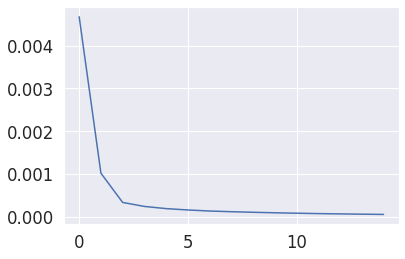

In [17]:
plt.plot(x,res[(5,11)][:15])

In [20]:
x = list(range(1,16))

In [21]:
x

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [18]:
res[(5,11)][:15]

array([4.67286212e-03, 1.02220709e-03, 3.38103797e-04, 2.45194242e-04,
       1.94011969e-04, 1.62438431e-04, 1.37947383e-04, 1.22145924e-04,
       1.08524124e-04, 9.69111570e-05, 8.69143405e-05, 7.77735404e-05,
       7.08848456e-05, 6.41846636e-05, 5.87183968e-05], dtype=float32)

In [34]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

b_list = []

for k,v in res.items():


    # Data provided by the user

    l = 197
    x = np.array(range(1,l+1))
    y = v[:l]
    # Defining the model function
    def model_func(m, a, b, c):
        return a / (m**b) + c

    # Using curve_fit to fit the model function to the data
    popt, pcov = curve_fit(model_func, x, y, maxfev=10000)

    # Extracting the parameters a, b, and c
    a, b, c = popt

    b_list.append(b)


In [35]:
np.max(b_list)

9.50629632779041

(array([21., 26., 17., 17., 21., 13., 12.,  5.,  5.,  7.]),
 array([1.18192056, 2.01435814, 2.84679571, 3.67923329, 4.51167087,
        5.34410844, 6.17654602, 7.0089836 , 7.84142117, 8.67385875,
        9.50629633]),
 <BarContainer object of 10 artists>)

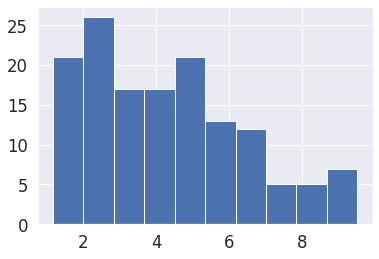

In [36]:
plt.hist(b_list)

In [39]:
m = [1,3,45,50,55]
e = [1.57,1.46,1.18,1.16,1.16]

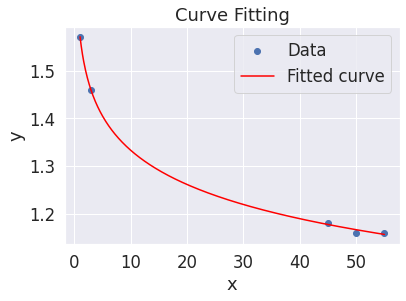

(755.9817426850907, 0.0001369938754363313, -754.4101731967544)

In [40]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Data provided by the user
x = m
y = e

# Defining the model function
def model_func(m, a, b, c):
    return a / (m**b) + c

# Using curve_fit to fit the model function to the data
popt, pcov = curve_fit(model_func, x, y, maxfev=10000)

# Extracting the parameters a, b, and c
a, b, c = popt

# Generating a smooth line for the fitted function
x_smooth = np.linspace(min(x), max(x), 500)
y_smooth = model_func(x_smooth, *popt)

# Plotting the data and the fitted curve
plt.scatter(x, y, label='Data')
plt.plot(x_smooth, y_smooth, color='red', label='Fitted curve')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Curve Fitting')
plt.legend()
plt.show()

a, b, c  # Return the values of a, b, and c

